# Data Exploration

## Imports

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go 
import seaborn as sns
import plotly.io as pio
from IPython.display import Image


In [2]:
sns.set()
%matplotlib inline
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option("expand_frame_repr", False)
pd.set_option('display.float_format', '{:.2f}'.format)

In [3]:
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from dvc_helper import DvcHelper
from df_overview import DfOverview
from df_cleaner import DfCleaner
from df_outlier import DfOutlier
import vis_seaborn as vis_seaborn
import vis_plotly as vis_plotly

2021-07-27 23:53:31,271 — DfOverview — DEBUG — Loaded successfully!
2021-07-27 23:53:31,274 — DfCleaner — DEBUG — Loaded successfully!
2021-07-27 23:53:31,277 — DfOutlier — DEBUG — Loaded successfully!


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


class VisSeaborn():

  def __init__(self):
    pass

  def single_plot(self, plot, title, x_labels, y_labels, figsize):
      fig, ax = plt.subplots(figsize=figsize)
      def _ax(__, _): return ax
      plot(0, 0, _ax)
      plt.title(title, fontsize=15, fontweight='bold')
      plt.xlabel(x_labels[0], fontsize=14)
      plt.ylabel(y_labels[0], fontsize=14)
      fig.show()

  def vertical_plot(self, plot, rows, title, subtitles, x_labels, y_labels, figsize):
    fig, ax = plt.subplots(rows, 1, sharex=True, figsize=figsize)
    def _ax(x, _): return ax[x]
    for r in range(rows):
      ax[r].set_title(subtitles[r])
      ax[r].set(xlabel=x_labels[r], ylabel='')
      plot(r, 0, _ax)
    fig.suptitle(title, fontsize=15, fontweight='bold')
    fig.subplots_adjust(hspace=0.2)
    fig.show()

  def horizontal_plot(self, plot, cols, title, subtitles, x_labels, y_labels, figsize):
    fig, ax = plt.subplots(1, cols, sharex=True, figsize=figsize)
    def _ax(_, y): return ax[y]
    for c in range(cols):
      ax[c].set_title(subtitles[c])
      ax[c].set(xlabel='', ylabel=y_labels[c])
      plot(0, c, _ax)
    fig.suptitle(title, fontsize=15, fontweight='bold')
    fig.subplots_adjust(wspace=0.2)
    fig.show()

  def square_plots(self, plot, rows, cols, title, subtitles, x_labels, y_labels, figsize):
    fig, ax = plt.subplots(rows, cols, sharex=True, figsize=figsize)
    def _ax(x, y): return ax[x, y]
    for r in range(rows):
      for c in range(cols):
        ax[r, c].set_title(subtitles[(r * cols) + c])
        ax[r, c].set(xlabel=x_labels[(r * cols) + c], ylabel=y_labels[(r * cols) + c])
        plot(r, c, _ax)
    fig.suptitle(title, fontsize=15, fontweight='bold')
    fig.subplots_adjust(hspace=0.2, wspace=0.2)
    fig.show()

  def subplots(self, plot, rows, cols, title, subtitles, x_labels, y_labels, figsize):
    if(subtitles == ""):
      subtitles = [""] * rows * cols
    if(x_labels == ""):
      x_labels = [""] * rows * cols
    if(y_labels == ""):
      y_labels = [""] * rows * cols

    if(rows == 1 and cols == 1):
      return self.single_plot(plot, title, x_labels, y_labels, figsize)
    if(rows == 1):
      return self.horizontal_plot(plot, cols, title, subtitles, x_labels, y_labels, figsize)
    elif(cols == 1):
      return self.vertical_plot(plot, rows, title, subtitles, x_labels, y_labels, figsize)
    else:
      return self.square_plots(plot, rows, cols, title, subtitles, x_labels, y_labels, figsize)

  def boxplot(self, df, y_value, title="", subtitles="", rows=1, cols=1, x_labels="", y_labels="", figsize=(8, 6)):
    def plot(r, c, ax): return sns.boxplot(y=df[y_value[(r * cols) + c]], ax=ax(r, c))
    self.subplots(plot, rows, cols, title, subtitles, x_labels, y_labels, figsize)


In [5]:
sn = VisSeaborn()


## Data

In [6]:
dvc_helper = DvcHelper()

In [7]:
df_store = dvc_helper.read_csv('../data/clean_store.csv')
df_train = dvc_helper.read_csv('../data/clean_train.csv')
df_test = dvc_helper.read_csv('../data/clean_test.csv')

2021-07-27 23:53:31,532 — DfHelper — DEBUG — file read as csv
2021-07-27 23:53:32,025 — DfHelper — DEBUG — file read as csv
2021-07-27 23:53:32,053 — DfHelper — DEBUG — file read as csv


## Comparing Test and Train data

In [8]:
def compare_test_train(train_data, test_data, feature, title):
  fig, ax = plt.subplots(1, 2, sharex=True, figsize=(12, 4))
  ax[0].set_title("Train " + title)
  sns.countplot(x=feature, data=train_data, ax=ax[0])
  ax[1].set_title("Test " + title)
  sns.countplot(x=feature, data=test_data, ax=ax[1])
  fig.subplots_adjust(wspace=0.3)
  fig.show()

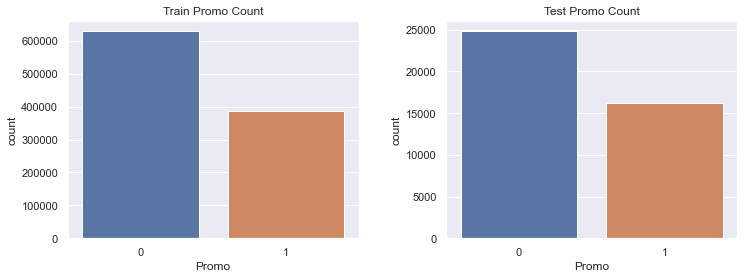

In [9]:
compare_test_train(df_train, df_test, 'Promo', "Promo Count")

As we can see promotion is on similar proportion

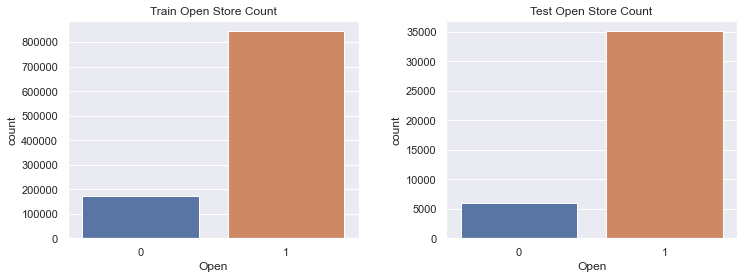

In [10]:
compare_test_train(df_train, df_test, 'Open', "Open Store Count")

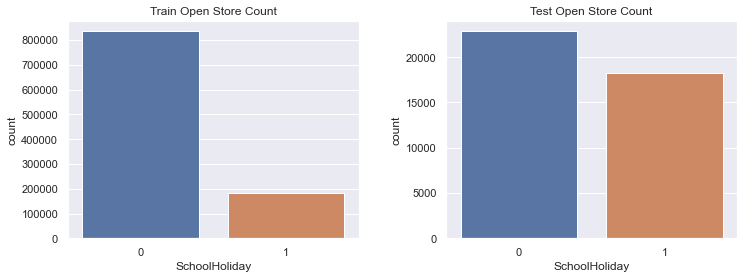

In [11]:
compare_test_train(df_train, df_test, 'SchoolHoliday', "Open Store Count")

This is way different

In [12]:
df_train["StateHoliday"].loc[df_train["StateHoliday"] == 0] = "0"
df_test["StateHoliday"].loc[df_test["StateHoliday"] == 0] = "0"

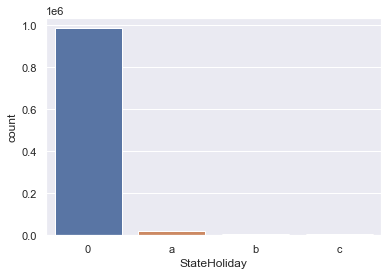

In [13]:
sns.countplot(x="StateHoliday", data=df_train)
plt.show()

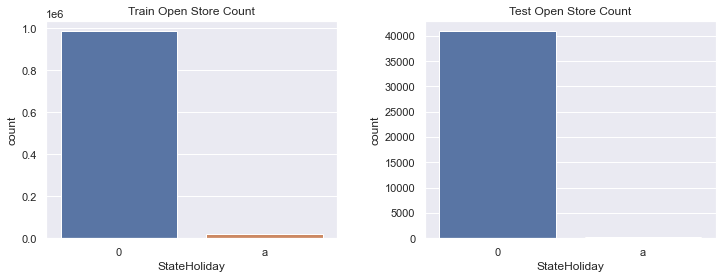

In [14]:
compare_test_train(df_train, df_test, 'StateHoliday', "Open Store Count")

## Joining store and train datasets

Now I will join Store and train data. Further analysis will be done using the joint columns.

In [15]:
df_train_store = pd.merge(df_train.reset_index(), df_store, how='inner', on='Store')
df_train_store.shape

(1017209, 22)

For further analysis I will split the Data column into year, month, and date


In [16]:
df_train_store['Year'] = pd.DatetimeIndex(df_train_store['Date']).year
df_train_store['Month'] = pd.DatetimeIndex(df_train_store['Date']).month
df_train_store['Date'] = pd.DatetimeIndex(df_train_store['Date']).day
df_train_store.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 24 columns):
 #   Column                     Non-Null Count    Dtype 
---  ------                     --------------    ----- 
 0   index                      1017209 non-null  int64 
 1   Store                      1017209 non-null  int64 
 2   DayOfWeek                  1017209 non-null  int64 
 3   Date                       1017209 non-null  int64 
 4   Sales                      1017209 non-null  int64 
 5   Customers                  1017209 non-null  int64 
 6   Open                       1017209 non-null  int64 
 7   Promo                      1017209 non-null  int64 
 8   StateHoliday               1017209 non-null  object
 9   SchoolHoliday              1017209 non-null  int64 
 10  StoreType                  1017209 non-null  object
 11  Assortment                 1017209 non-null  object
 12  CompetitionDistance        1017209 non-null  int64 
 13  CompetitionOpenSinceMonth  

## Seasonality

lets start by joining store and train datasets

In [17]:
store_type_df = df_train_store.groupby('StoreType').agg(
    {'Customers': 'mean', 'Sales': 'mean'})
store_type_df


,Customers,Sales
StoreType,,
a,640.03,5640.54
b,1321.56,9198.32
c,663.82,5668.12
d,501.29,5611.88


Store b has more than doubles other store in avarage customers count and has almost the double of
other store in avarage sales.

In [18]:
date_df = df_train_store.groupby('Date').agg(
    {'Customers': 'mean', 'Sales': 'mean'})
date_df.head()

,Customers,Sales
Date,,
1,466.90,4545.37
2,705.13,6818.78
3,587.46,5697.91
4,693.80,6700.13
5,651.03,6259.49


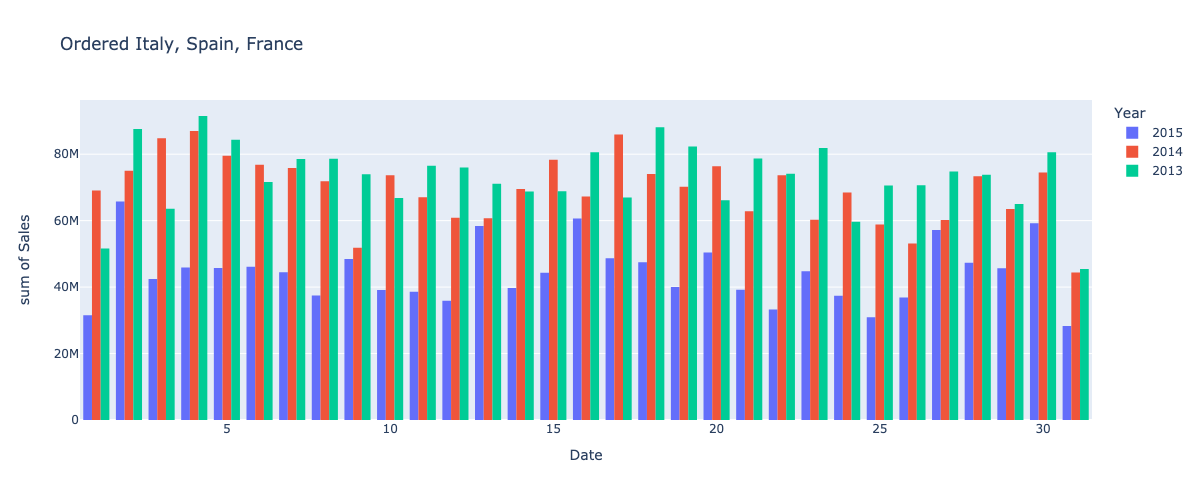

In [19]:
fig = px.histogram(
    df_train_store,
    x="Date",
    y="Sales",
    color="Year",
    barmode="group",
    title=f"Ordered Italy, Spain, France",
      category_orders={"Country Name": ["Italy", "Spain", "France"]},
)
Image(pio.to_image(fig, format='png', width=1200))


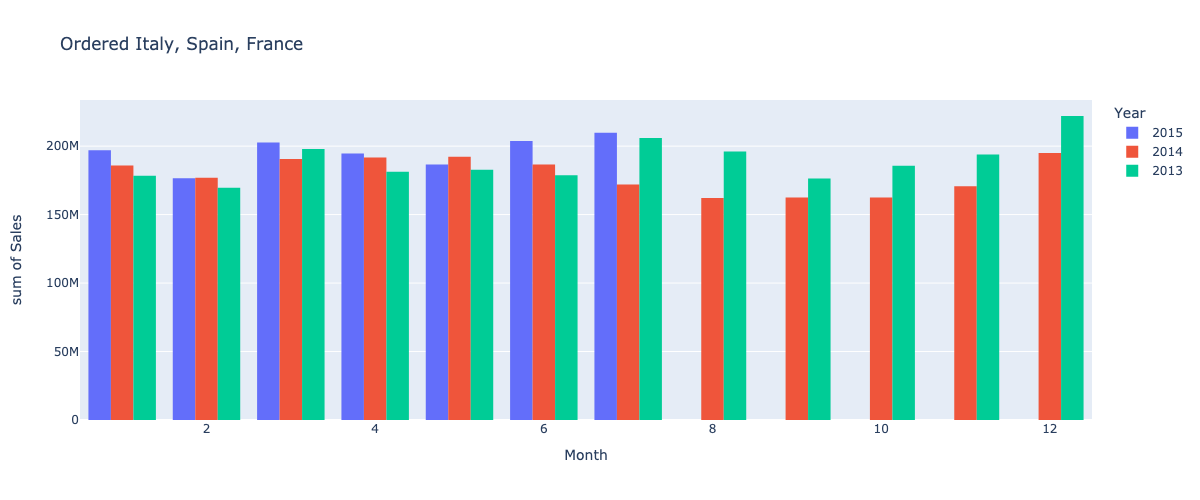

In [20]:
fig = px.histogram(
    df_train_store,
      x="Month",
      y="Sales",
      color="Year",
      barmode="group",
      title=f"Ordered Italy, Spain, France",
      category_orders={"Country Name":["Italy","Spain","France"]}
      )
Image(pio.to_image(fig, format='png', width=1200))

In [21]:
daily_trend = df_train_store.groupby(['Date', 'StoreType']).agg(
    {'Customers': 'mean', 'Sales': 'mean'})
daily_trend = daily_trend.unstack().swaplevel(0, 1, 1).sort_index(1)


In [22]:
def plot_trend(df, columns, feature, title, x_label="", y_label="", labels=['']):
  plt.figure(figsize=(18, 6))
  for i in range(len(columns)):
    sns.lineplot(x=df.index, y=df[columns[i]][feature], label=labels[i])
  plt.title(title, fontsize=15, fontweight='bold')
  plt.ylabel(x_label, fontsize=14)
  plt.xlabel(y_label, fontsize=14)
  plt.show()


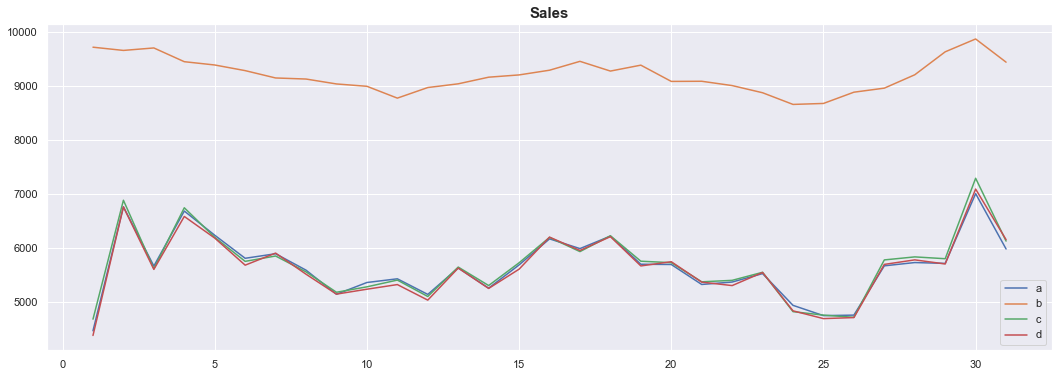

In [23]:
plot_trend(daily_trend, ['a', 'b', 'c', 'd'], 'Sales', 'Sales', labels=['a', 'b', 'c', 'd'])

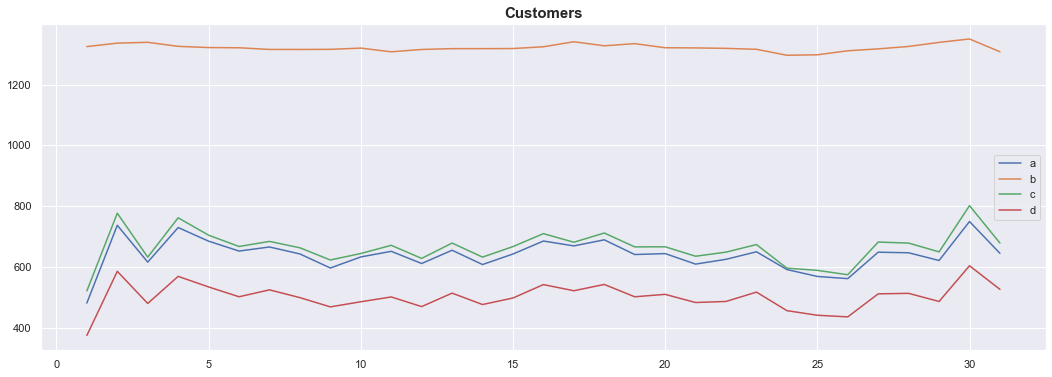

In [24]:
plot_trend(daily_trend, ['a', 'b', 'c', 'd'], 'Customers', 'Customers', labels=['a', 'b', 'c', 'd'])


In [25]:
monthly_trend = df_train_store.groupby(['Month', 'StoreType']).agg(
    {'Customers': 'mean', 'Sales': 'mean'})
monthly_trend = monthly_trend.unstack().swaplevel(0, 1, 1).sort_index(1)


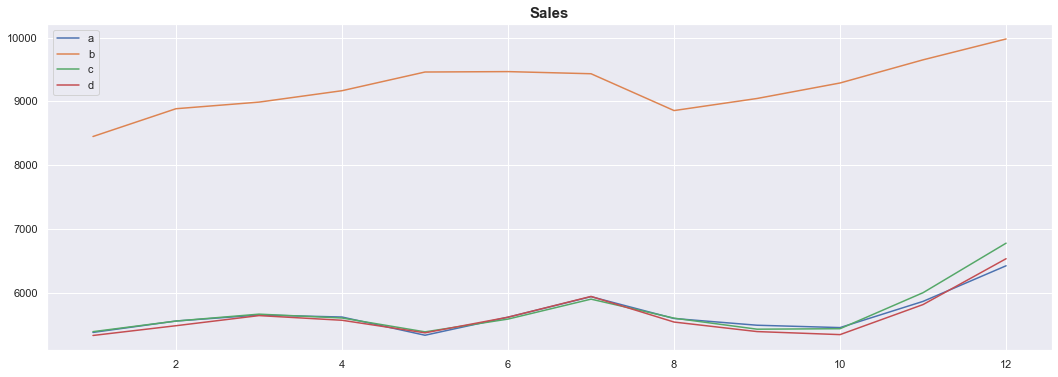

In [26]:
plot_trend(monthly_trend, ['a', 'b', 'c', 'd'], 'Sales', 'Sales', labels=['a', 'b', 'c', 'd'])


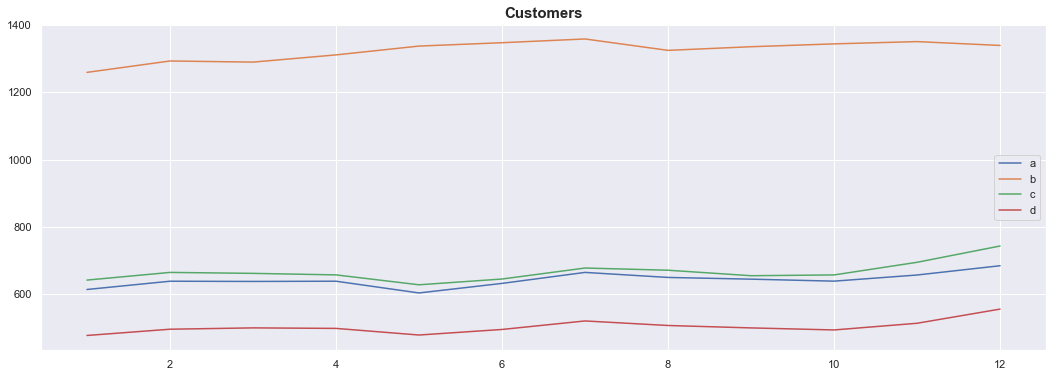

In [27]:
plot_trend(monthly_trend, ['a', 'b', 'c', 'd'], 'Customers', 'Customers', labels=['a', 'b', 'c', 'd'])


Now lets look at Hollydays

In [28]:
hollyday_trend = df_train_store.groupby(['Month', 'StateHoliday']).agg(
    {'Customers': 'mean', 'Sales': 'mean'})
hollyday_trend.reset_index(inplace=True)

In [29]:
fig = px.histogram(
    hollyday_trend,
      x="Month",
      y="Sales",
      color="StateHoliday",
      barmode="group",
      title=f"Ordered Italy, Spain, France",
      category_orders={"Country Name":["Italy","Spain","France"]}
      )
df = px.data.gapminder().query("continent=='Oceania'")


In [30]:
df = df_train_store.query("Year==2013")
df

,index,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval0,PromoInterval1,PromoInterval2,PromoInterval3,Year,Month
577,610235,1,2,31,2362,298,1,0,0,1,c,a,1270,9,2008,0,0,2008,0,0,0,0,2013,12
578,611350,1,1,30,7193,796,1,0,0,1,c,a,1270,9,2008,0,0,2008,0,0,0,0,2013,12
579,612465,1,7,29,0,0,0,0,0,1,c,a,1270,9,2008,0,0,2008,0,0,0,0,2013,12
580,613580,1,6,28,5659,716,1,0,0,1,c,a,1270,9,2008,0,0,2008,0,0,0,0,2013,12
581,614695,1,5,27,6110,737,1,0,0,1,c,a,1270,9,2008,0,0,2008,0,0,0,0,2013,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1012749,1115,6,5,4771,339,1,0,0,1,d,c,5350,1,1990,1,22,1990,3,6,9,12,2013,1
1017205,1013864,1115,5,4,4540,326,1,0,0,1,d,c,5350,1,1990,1,22,1990,3,6,9,12,2013,1
1017206,1014979,1115,4,3,4297,300,1,0,0,1,d,c,5350,1,1990,1,22,1990,3,6,9,12,2013,1
1017207,1016094,1115,3,2,3697,305,1,0,0,1,d,c,5350,1,1990,1,22,1990,3,6,9,12,2013,1


In [54]:
df = df_train_store.query("Store==1 and Year==2013 and Month==1")
df


,index,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval0,PromoInterval1,PromoInterval2,PromoInterval3,Year,Month
911,982645,1,4,31,4709,571,1,0,0,0,c,a,1270,9,2008,0,0,2008,0,0,0,0,2013,1
912,983760,1,3,30,4601,560,1,0,0,0,c,a,1270,9,2008,0,0,2008,0,0,0,0,2013,1
913,984875,1,2,29,3725,522,1,0,0,0,c,a,1270,9,2008,0,0,2008,0,0,0,0,2013,1
914,985990,1,1,28,4055,549,1,0,0,0,c,a,1270,9,2008,0,0,2008,0,0,0,0,2013,1
915,987105,1,7,27,0,0,0,0,0,0,c,a,1270,9,2008,0,0,2008,0,0,0,0,2013,1
916,988220,1,6,26,5598,640,1,0,0,0,c,a,1270,9,2008,0,0,2008,0,0,0,0,2013,1
917,989335,1,5,25,5586,676,1,1,0,0,c,a,1270,9,2008,0,0,2008,0,0,0,0,2013,1
918,990450,1,4,24,5195,645,1,1,0,0,c,a,1270,9,2008,0,0,2008,0,0,0,0,2013,1
919,991565,1,3,23,5578,627,1,1,0,0,c,a,1270,9,2008,0,0,2008,0,0,0,0,2013,1
920,992680,1,2,22,5720,667,1,1,0,0,c,a,1270,9,2008,0,0,2008,0,0,0,0,2013,1


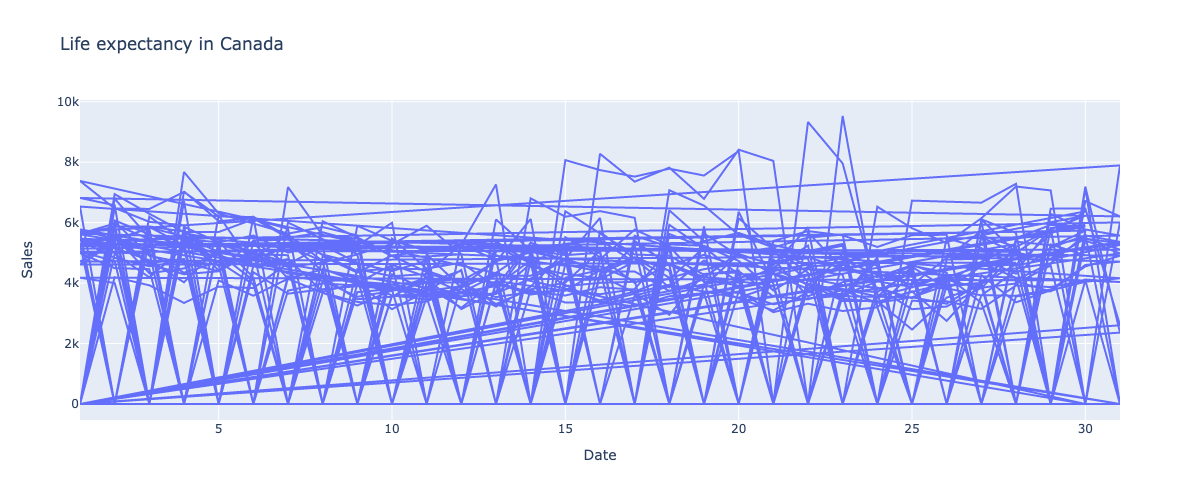

In [45]:
df = df_train_store.query("Year==2013" and "Month==1" and "Store==1")
fig = px.line(df, x="Date", y="Sales", title='Life expectancy in Canada')
Image(pio.to_image(fig, format='png', width=1200))


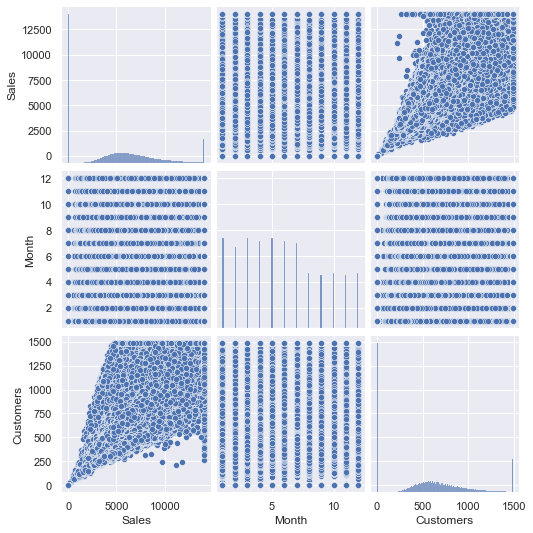

In [32]:
sns.pairplot(data=df_train_store[['Sales', 'Month', 'Customers']])


In [33]:
corr_all = df_train_store.drop('Open', axis=1).corr()

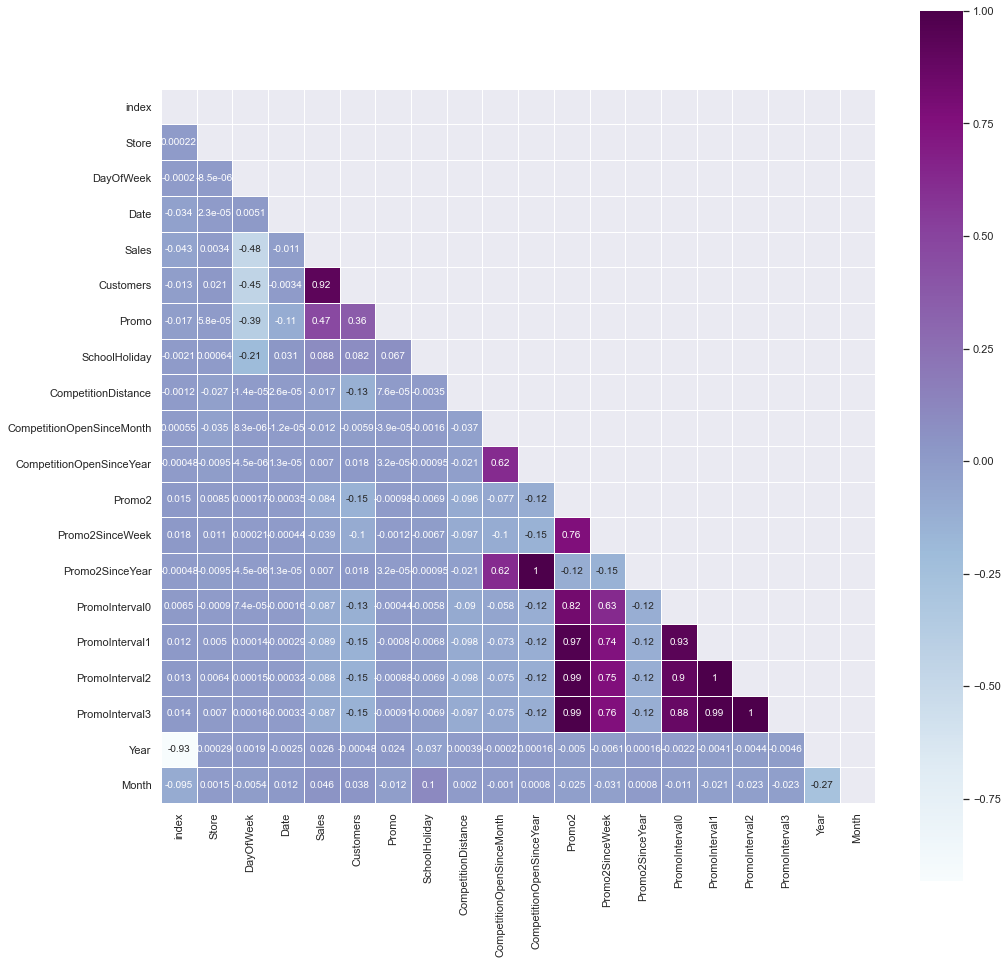

In [40]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr_all, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(16, 16))

sns.heatmap(corr_all, mask=mask,
            square=True, linewidths=.5, ax=ax, cmap="BuPu", annot=True)
plt.show()


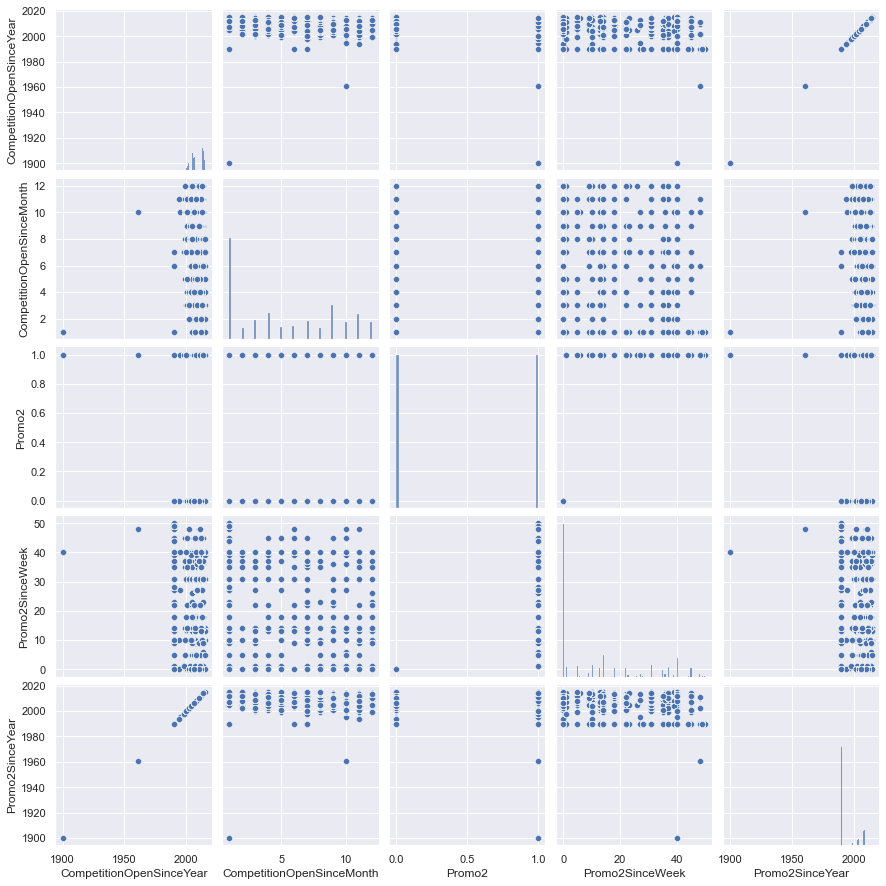

In [55]:
sns.pairplot(data=df_train_store[['CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear']])

In [35]:
hollyday_trend = df_train_store.groupby(['Date', 'StateHoliday']).agg(
    {'Customers': 'mean', 'Sales': 'mean'})
hollyday_trend.reset_index(inplace=True)


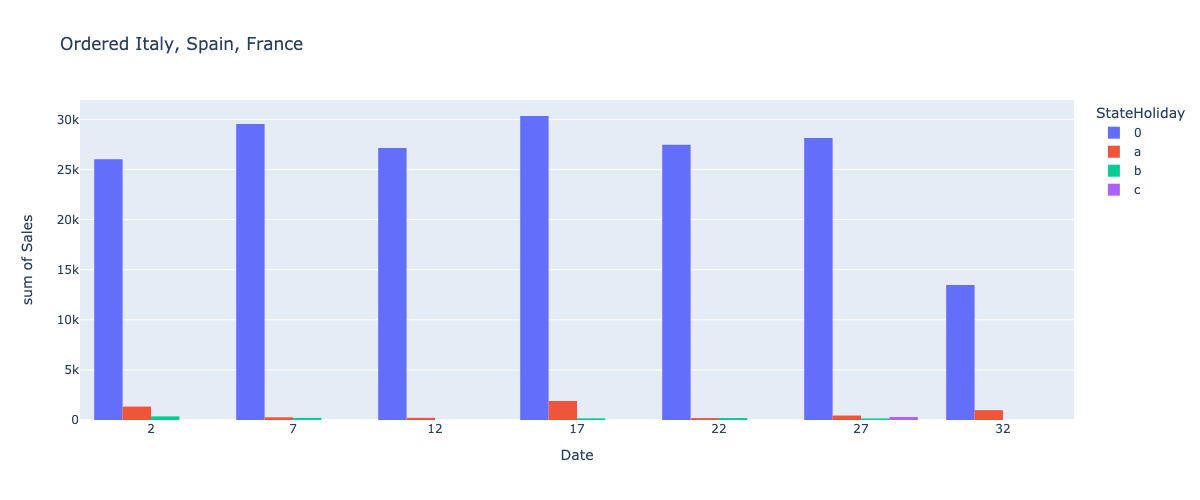

In [36]:
fig = px.histogram(
    hollyday_trend,
    x="Date",
    y="Sales",
    color="StateHoliday",
    barmode="group",
    title=f"Ordered Italy, Spain, France",
      category_orders={"Country Name": ["Italy", "Spain", "France"]}
)
Image(pio.to_image(fig, format='png', width=1200))


In [37]:
new_df["Store A Sales"] = date_store_type_df['a'][['Sales']].resample('W').mean()
new_df["Store B Sales"] = date_store_type_df['b'][['Sales']].resample('W').mean()
new_df["Store C Sales"] = date_store_type_df['c'][['Sales']].resample('W').mean()
new_df["Store D Sales"] = date_store_type_df['d'][['Sales']].resample('W').mean()
columns = ["Store A Sales", "Store B Sales", "Store C Sales", "Store D Sales"]
plot_trend(new_df, columns ,'Monthly Trend Across Store Types', "Monthly Sales", "Datetime", labels=columns)

NameError: name 'date_store_type_df' is not defined

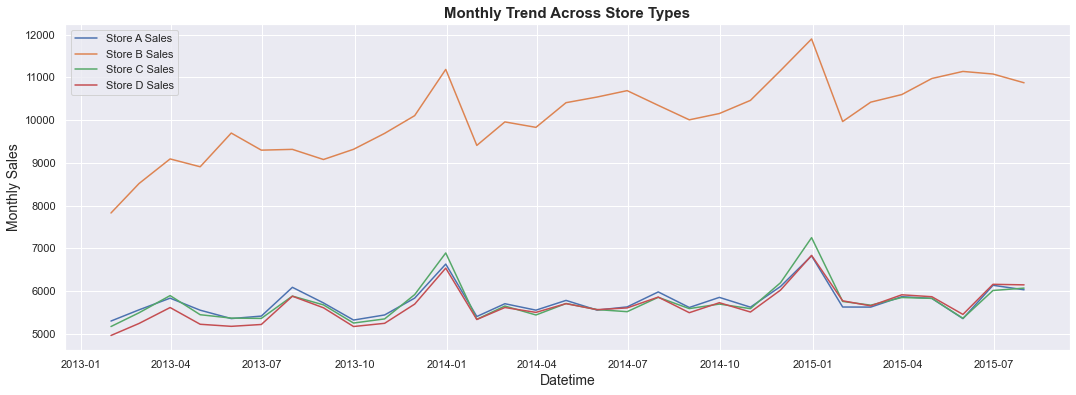

In [ ]:
new_df["Store A Sales"] = date_store_type_df['a'][['Sales']].resample('M').mean()
new_df["Store B Sales"] = date_store_type_df['b'][['Sales']].resample('M').mean()
new_df["Store C Sales"] = date_store_type_df['c'][['Sales']].resample('M').mean()
new_df["Store D Sales"] = date_store_type_df['d'][['Sales']].resample('M').mean()
columns = ["Store A Sales", "Store B Sales", "Store C Sales", "Store D Sales"]
plot_trend(new_df, columns ,'Monthly Trend Across Store Types', "Monthly Sales", "Datetime", labels=columns)

Customers count throught the year

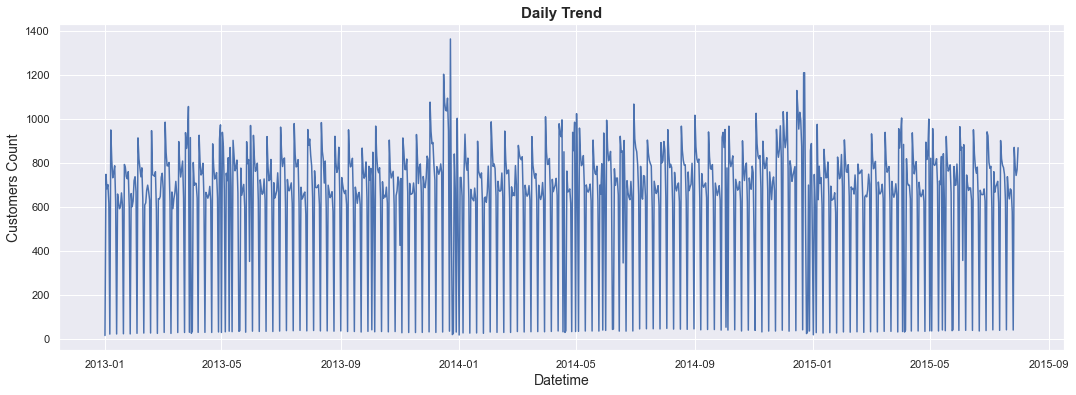

In [ ]:
plot_trend(date_df, ['Customers'], 'Daily Trend', "Customers Count", "Datetime")

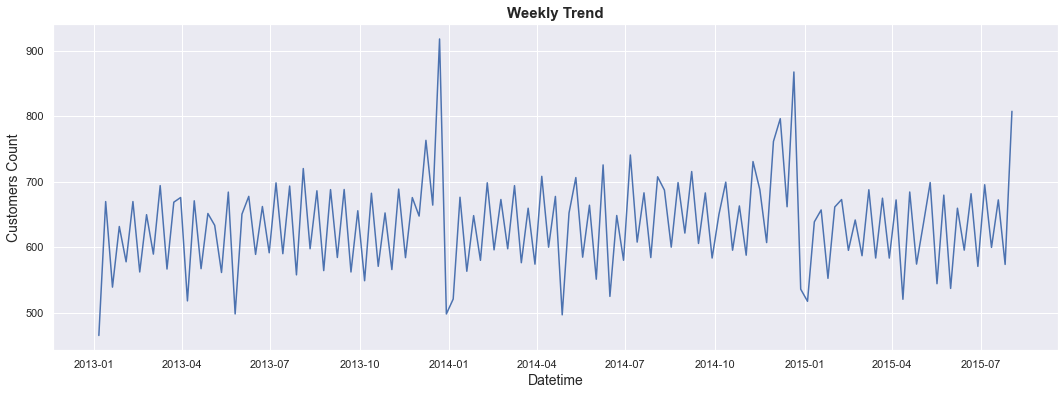

In [ ]:
plot_trend(date_df[['Customers']].resample('W').mean(), ['Customers'], 'Weekly Trend', "Customers Count", "Datetime")

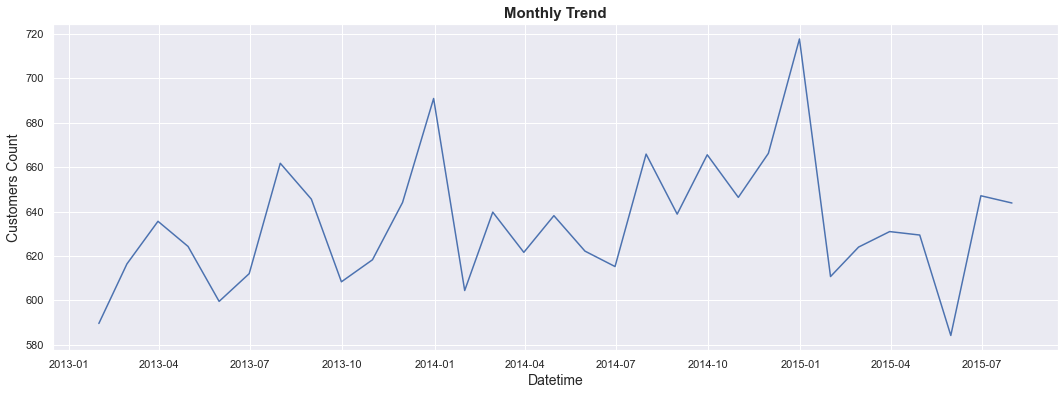

In [ ]:
plot_trend(date_df[['Customers']].resample('M').mean(), ['Customers'], 'Monthly Trend', "Customers Count", "Datetime")

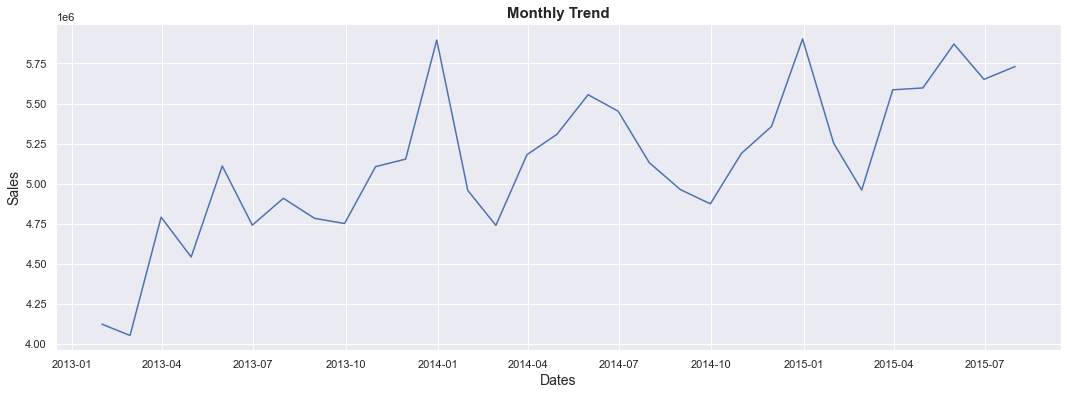

In [ ]:
monthly_df = date_store_type_df['b'][["Sales"]].resample('M').sum()
plot_trend(monthly_df, 'Monthly Trend')

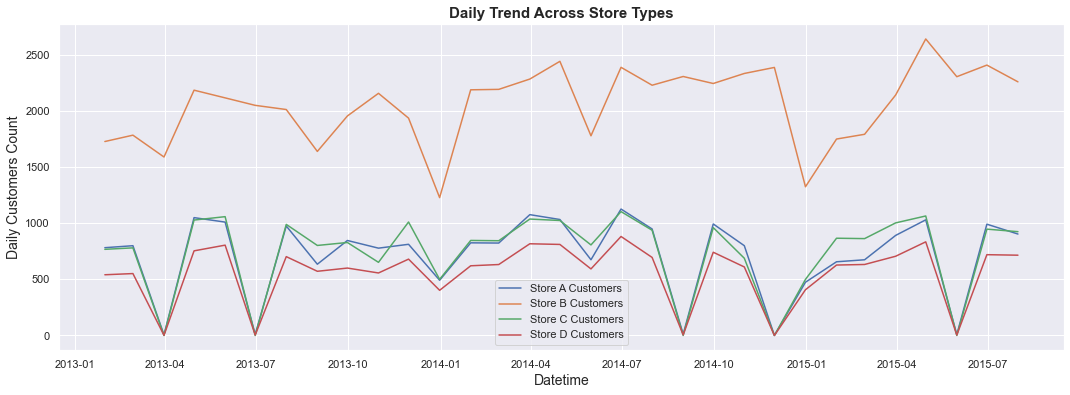

In [ ]:
new_df["Store A Customers"] = date_store_type_df['a'][['Customers']]
new_df["Store B Customers"] = date_store_type_df['b'][['Customers']]
new_df["Store C Customers"] = date_store_type_df['c'][['Customers']]
new_df["Store D Customers"] = date_store_type_df['d'][['Customers']]
columns = ["Store A Customers", "Store B Customers", "Store C Customers", "Store D Customers"]
plot_trend(new_df, columns, 'Daily Trend Across Store Types', "Daily Customers Count", "Datetime", labels=columns)

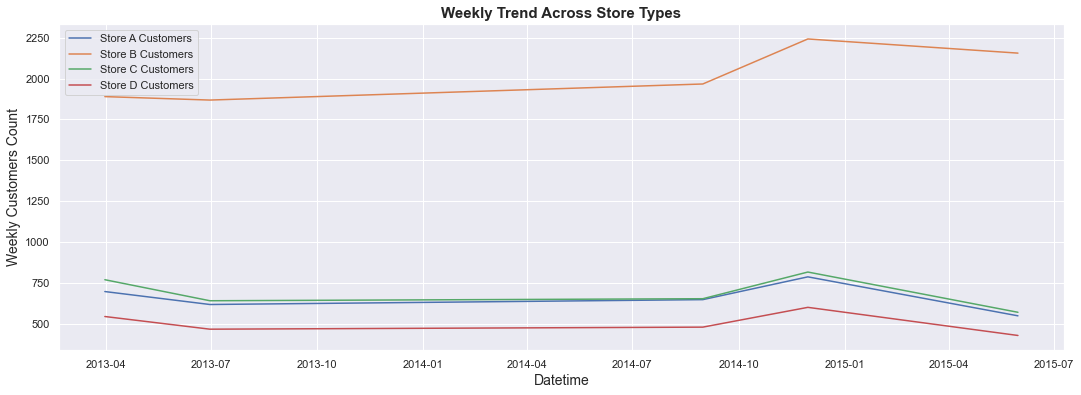

In [ ]:
new_df["Store A Customers"] = date_store_type_df['a'][['Customers']].resample('W').mean()
new_df["Store B Customers"] = date_store_type_df['b'][['Customers']].resample('W').mean()
new_df["Store C Customers"] = date_store_type_df['c'][['Customers']].resample('W').mean()
new_df["Store D Customers"] = date_store_type_df['d'][['Customers']].resample('W').mean()
columns = ["Store A Customers", "Store B Customers", "Store C Customers", "Store D Customers"]
plot_trend(new_df, columns, 'Weekly Trend Across Store Types', "Weekly Customers Count", "Datetime", labels=columns)

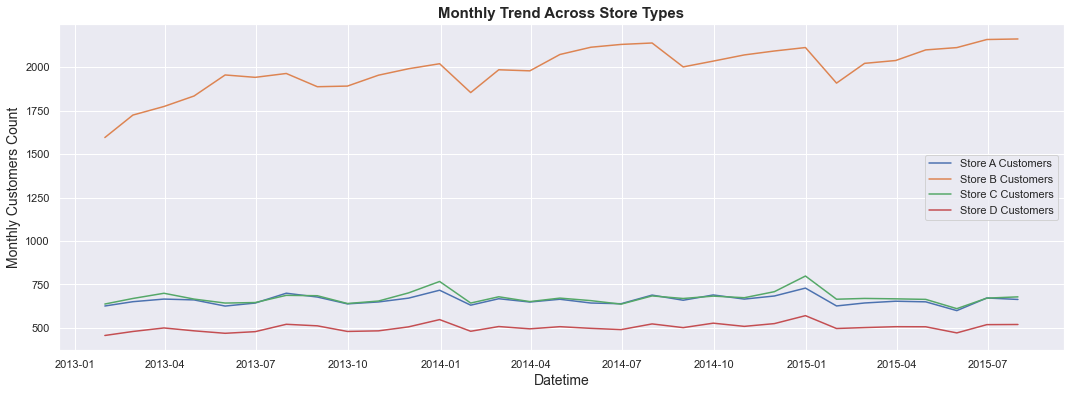

In [ ]:
new_df["Store A Customers"] = date_store_type_df['a'][['Customers']].resample('M').mean()
new_df["Store B Customers"] = date_store_type_df['b'][['Customers']].resample('M').mean()
new_df["Store C Customers"] = date_store_type_df['c'][['Customers']].resample('M').mean()
new_df["Store D Customers"] = date_store_type_df['d'][['Customers']].resample('M').mean()
columns = ["Store A Customers", "Store B Customers", "Store C Customers", "Store D Customers"]
plot_trend(new_df, columns, 'Monthly Trend Across Store Types', "Monthly Customers Count", "Datetime", labels=columns)


Seosonality during holidys

In [ ]:
train_store_df['StateHoliday'] 


,StateHoliday
0,0
1,0
2,0
3,0
4,0
...,...
1017204,0
1017205,0
1017206,0
1017207,0


In [ ]:
date_holiday_type_df = train_store_df.groupby(['Date', 'StateHoliday']).agg(
    {'Customers': 'mean', 'Sales': 'mean'})
date_holiday_type_df = date_store_type_df.unstack().swaplevel(0, 1, 1).sort_index(1)
date_holiday_type_df

ValueError: No axis named 1 for object type Series